<a href="https://colab.research.google.com/github/SajalSinha/Corona_tweet_sentimental_Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

#Downloading libraries

In [1]:
#for data manipulation
import pandas as pd
import numpy as np
import re
import string

#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#for ML
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#Getting Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project 3/Coronavirus Tweet Sentiment Analysis/Data & Resources/Coronavirus Tweets.csv',encoding='latin-1')

In [8]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


#EDA

In [9]:
count = df.isnull().sum().sort_values(ascending = False)

In [10]:
percentage = ((df.isnull().sum())/len(df)*100).sort_values(ascending=False)

In [11]:
missing_data = pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])

In [12]:
missing_data

,Count,Percentage
Location,8590,20.871298
Sentiment,0,0.000000
OriginalTweet,0,0.000000
TweetAt,0,0.000000
ScreenName,0,0.000000
UserName,0,0.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Sentiment distributions')

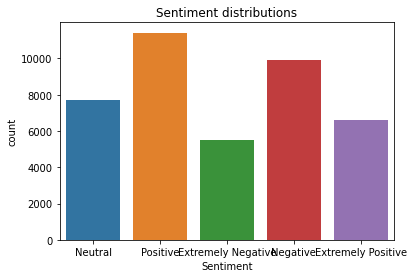

In [14]:
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment distributions')

#Preprocessing data

In [15]:
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [16]:
def preprocessing_text(data):
  data =data.lower()
  data = re.sub(r'http\S+|www\S+|https\S',' ',data,flags=re.MULTILINE)
  data = data.translate(str.maketrans('','',string.punctuation))
  data = re.sub(r'\@\w+|\#'," ", data)
  data_token = word_tokenize(data)
  filtered_words = [word for word in data_token if word not in stop_words]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w,pos='a') for w in stemmed_words]
  return ' '.join(lemma_words)

In [17]:
df['Processed_text'] = df['OriginalTweet'].apply(preprocessing_text)

In [18]:
df.head()

,OriginalTweet,Sentiment,Processed_text
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic enough f...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket covid19 outbreak im paran...


In [19]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [20]:
encoders_nums = {"Sentiment":{"Neutral": 'Neutral' ,"Positive": 'Positive','Extremely Negative':'Negative','Extremely Positive':'Positive','Negative':'Negative'}}
df = df.replace(encoders_nums)

In [21]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

#Model Training

In [22]:
x = df.Processed_text
y = df.Sentiment
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 225)
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  37041
x_test:  4116
y_train:  37041
y_test:  4116


In [23]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
predictions = model.predict(x_test)
prediction_train = model.predict(x_train)

In [28]:
confusion_matrix(predictions,y_test)

array([[1278,  144,  185],
       [  68,  481,   75],
       [ 206,  178, 1501]])

In [29]:
confusion_matrix(prediction_train,y_train)

array([[12473,   667,   893],
       [  315,  5368,   234],
       [ 1058,   875, 15158]])

In [30]:
print('Accuracy score of train set: ',accuracy_score(prediction_train,y_train))
print('Precission of train set: ',precision_score(prediction_train,y_train, average = 'weighted'))
print('Recall of train set: ',recall_score(prediction_train,y_train, average = 'weighted'))

Accuracy score of train set:  0.8908776760886585
Precission of train set:  0.8948535506549515
Recall of train set:  0.8908776760886585


In [31]:
print('Accuracy score of test set: ',accuracy_score(predictions,y_test))
print('Precission of test set: ',precision_score(predictions,y_test, average = 'weighted'))
print('Recall of test set: ',recall_score(predictions,y_test, average = 'weighted'))

Accuracy score of test set:  0.7920310981535471
Precission of test set:  0.802662900884536
Recall of test set:  0.7920310981535471


In [32]:
print(classification_report(y_test,predictions))
print("\n")
print(classification_report(y_train,prediction_train))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      1552
     Neutral       0.77      0.60      0.67       803
    Positive       0.80      0.85      0.82      1761

    accuracy                           0.79      4116
   macro avg       0.79      0.76      0.77      4116
weighted avg       0.79      0.79      0.79      4116



              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     13846
     Neutral       0.91      0.78      0.84      6910
    Positive       0.89      0.93      0.91     16285

    accuracy                           0.89     37041
   macro avg       0.89      0.87      0.88     37041
weighted avg       0.89      0.89      0.89     37041



#Try Example

In [49]:
example = ['Today is a good day']
result = model.predict(example)
print(result)

['Positive']
